In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
billboards = pd.read_csv('data/BIllboards.csv')
billboards_features = pd.read_csv('data/billboard_features.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/BIllboards.csv'

In [3]:
billboards = billboards.sort_values(by=['Weeks on Chart'],ascending=False)
billboards = billboards.drop_duplicates(subset=['Song'])
billboards.sort_values(by=['Song'])
billboards_features = billboards_features.sort_values(['Song'])
billboards = billboards.sort_values(['Song'])

In [4]:
billboards = billboards[['Song','Performer','WeekID','Peak Position','Weeks on Chart']]
feature_cols = ['Performer', 'Song',
       'spotify_track_explicit', 'spotify_track_duration_ms',
       'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']
billboards_features = billboards_features[feature_cols]

In [5]:
song_names = []
for song in billboards['Song']:
    song_names.append(song)

In [6]:
song_names_dict_features = dict(zip(billboards_features.index,song_names))
billboards_features = billboards_features.rename(song_names_dict_features,axis='index')
billboards_features = billboards_features.drop(['Song'],axis=1)

In [7]:
song_names_dict = dict(zip(billboards.index,song_names))
billboards= billboards.rename(song_names_dict,axis='index')
billboards = billboards.drop(['Song'],axis=1)


In [8]:
df_list = [billboards,billboards_features]
billboard_top_100 = pd.concat(df_list,axis=1)

In [9]:
billboard_top_100 = billboard_top_100.dropna()

In [10]:
def explicit_convert(ex):
    if ex:
        return 1
    else: 
        return 0
billboard_top_100["explicit"] = billboard_top_100["spotify_track_explicit"].apply(explicit_convert)
billboard_top_100 = billboard_top_100.drop(["spotify_track_explicit"],axis=1)

In [11]:
billboard_top_100['WeekID'] = pd.to_datetime(billboard_top_100['WeekID'])

In [12]:
billboard_top_100 = billboard_top_100.sort_values(['WeekID'],ascending=True)

In [13]:
#our outcome will be peak_position*week_on_chart
y = billboard_top_100['Peak Position'] * billboard_top_100['Weeks on Chart']
#y = billboard_top_100['Peak Position']
billboard_top_100_1 = billboard_top_100.drop(['Weeks on Chart','Peak Position'],axis=1)

In [14]:
X = billboard_top_100_1.drop(['Performer','Performer','WeekID'],axis=1)

In [15]:
pca_tf = PCA(n_components='mle')
features = pca_tf.fit_transform(X)
features.shape

(19614, 13)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2)

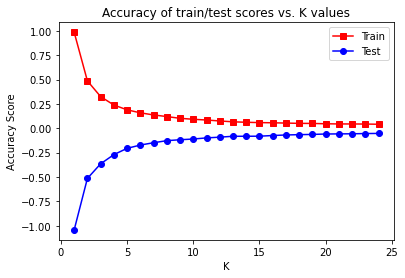

In [17]:
kvals = range(1,25)
train_score = []
test_score = []

for k in kvals:
    model = KNeighborsRegressor(k)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test, y_test))
    
plt.plot(kvals, train_score, 'r-s', label='Train')
plt.plot(kvals, test_score, 'b-o', label='Test')
plt.legend()
plt.title('Accuracy of train/test scores vs. K values')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

In [18]:
#sorting and training by year
def week_to_year(date):
    return date.year
billboard_top_100["YearID"] = billboard_top_100["WeekID"].apply(week_to_year)
billboard_top_100 = billboard_top_100.drop(["WeekID"],axis=1)

In [19]:
billboard_top_100 = billboard_top_100.drop(['Performer','Performer'],axis=1)
billboard_top_100

,Peak Position,Weeks on Chart,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit,YearID
Op,69.0,1.0,226706.0,0.440,0.976,10.0,-3.170,1.0,0.1410,0.00177,0.000003,0.1600,0.412,150.005,4.0,0,1958
Got A Match?,85.0,1.0,222333.0,0.646,0.527,11.0,-7.356,1.0,0.0478,0.01680,0.000000,0.2040,0.287,68.501,4.0,0,1958
(It's Been A Long Time) Pretty Baby,46.0,1.0,141426.0,0.511,0.236,0.0,-14.496,1.0,0.0430,0.67000,0.000000,0.0953,0.196,141.222,4.0,0,1958
Little Serenade,98.0,1.0,230320.0,0.565,0.245,5.0,-9.132,1.0,0.0262,0.78100,0.000000,0.0998,0.307,75.055,4.0,0,1958
To Be Loved,86.0,1.0,191266.0,0.738,0.768,11.0,-7.045,0.0,0.0348,0.38100,0.145000,0.1000,0.603,120.013,4.0,0,1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Start Wit Me,58.0,5.0,183800.0,0.617,0.488,7.0,-9.567,0.0,0.0350,0.26600,0.000000,0.1100,0.685,136.236,4.0,0,2019
Hot Girl Bummer,41.0,14.0,179613.0,0.665,0.498,5.0,-8.185,1.0,0.0831,0.22800,0.000000,0.0757,0.127,81.967,4.0,1,2019
Even Though I'm Leaving,11.0,34.0,272080.0,0.448,0.420,8.0,-9.948,1.0,0.0797,0.52600,0.000550,0.2230,0.325,183.337,3.0,0,2019
Juicy,47.0,8.0,191066.0,0.685,0.718,0.0,-7.724,1.0,0.0521,0.12200,0.000000,0.0556,0.958,131.463,4.0,0,2019


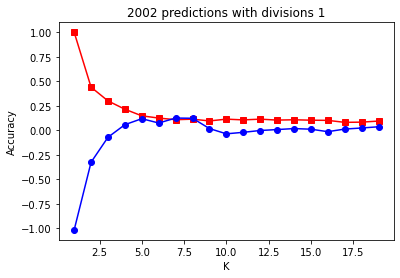

In [20]:
max_score = -100
max_score_k = -1
max_score_div = -1
max_score_year= -1
ranger = billboard_top_100['YearID'].max() - billboard_top_100['YearID'].min()
kvals = range(1,20)
for div in range(1,16):    
    min_year = billboard_top_100['YearID'].min()
    for i in range(ranger//div + 1):
        max_year = min_year + div
        if max_year > billboard_top_100['YearID'].max():
            max_year = billboard_top_100['YearID'].max()
        #print(min_year,end= " ")
        #print(max_year)
        less_than = billboard_top_100["YearID"] < max_year
        greater_than = min_year <= billboard_top_100["YearID"]
        total = less_than == greater_than
        data_set = billboard_top_100[total]
        X = data_set.drop(["YearID","Peak Position","Weeks on Chart"],axis=1)
        y = data_set['Peak Position']*data_set['Weeks on Chart']
        if min_year == max_year:
            continue
        #PCA
        pca = PCA(n_components='mle')
        X = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
        #processing
        train_score = []
        test_score = []
        max_score_set = False
        for k in kvals:
            model = KNeighborsRegressor(k)
            model.fit(X_train, y_train)
            train_score.append(model.score(X_train,y_train))
            test_score.append(model.score(X_test, y_test))
            temp = model.score(X_test, y_test)
            if temp > max_score:
                max_score = temp
                max_score_k = k
                max_score_div = div
                max_score_year = min_year
                max_score_set = True
        if max_score_set:
            plt.clf()
            plt.title("{} predictions with divisions {}".format(max_score_year,max_score_div))
            plt.xlabel("K")
            plt.ylabel("Accuracy")
            plt.plot(kvals, train_score, 'r-s', label='Train')
            plt.plot(kvals, test_score, 'b-o', label='Test')
        min_year = max_year

In [23]:
print(billboard_top_100.shape)
print(y.shape)

(19614, 17)
(411,)


In [25]:
y = billboard_top_100['Peak Position'] * billboard_top_100['Weeks on Chart']

In [27]:
y.to_csv('out.csv')